In [58]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
%matplotlib inline

In [59]:
df=pd.read_csv(r"C:\Users\KUMAR APPU\Downloads\py-master\py-master\ML\13_kmeans\income.csv")
df.head()

,Name,Age,Income($)
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000


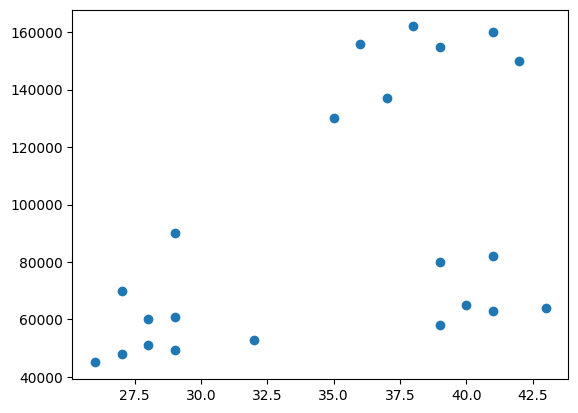

In [60]:
plt.scatter(df["Age"],df["Income($)"])

In [61]:
km = KMeans(n_clusters=3)
km

KMeans(n_clusters=3)

In [62]:
km.fit(df[["Age","Income($)"]])
y_predicted=km.predict(df[["Age","Income($)"]])
y_predicted

c:\Users\KUMAR APPU\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([2, 2, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0])

In [63]:
df["cluster"]=y_predicted
df.head()

,Name,Age,Income($),cluster
0,Rob,27,70000,2
1,Michael,29,90000,2
2,Mohan,29,61000,0
3,Ismail,28,60000,0
4,Kory,42,150000,1


Text(0, 0.5, 'Income')

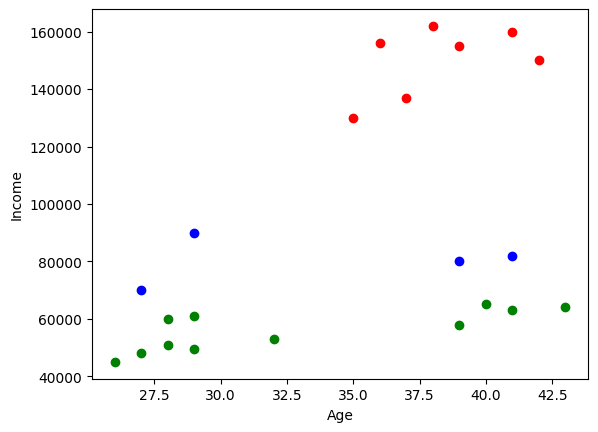

In [64]:
df1=df[df.cluster==0]
df2=df[df.cluster==1]
df3=df[df.cluster==2]
plt.scatter(df1["Age"], df1["Income($)"], color='g')
plt.scatter(df2["Age"], df2["Income($)"], color='r')
plt.scatter(df3["Age"], df3["Income($)"], color='b')
plt.xlabel("Age")
plt.ylabel("Income")

In [65]:
scaler=MinMaxScaler()
scaler.fit(df[["Income($)"]])
df[['Income($)']]=scaler.transform(df[['Income($)']])

scaler.fit(df[['Age']])
df[['Age']]=scaler.transform(df[['Age']])
df

,Name,Age,Income($),cluster
0,Rob,0.058824,0.213675,2
1,Michael,0.176471,0.384615,2
2,Mohan,0.176471,0.136752,0
3,Ismail,0.117647,0.128205,0
4,Kory,0.941176,0.897436,1
5,Gautam,0.764706,0.940171,1
6,David,0.882353,0.982906,1
7,Andrea,0.705882,1.000000,1
8,Brad,0.588235,0.948718,1
9,Angelina,0.529412,0.726496,1


In [66]:
km.fit(df[["Age","Income($)"]])
y_predicted=km.predict(df[["Age","Income($)"]])
y_predicted

c:\Users\KUMAR APPU\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2])

In [68]:
df["clusters"]=y_predicted
df.drop("cluster", axis="columns")

,Name,Age,Income($),clusters
0,Rob,0.058824,0.213675,1
1,Michael,0.176471,0.384615,1
2,Mohan,0.176471,0.136752,1
3,Ismail,0.117647,0.128205,1
4,Kory,0.941176,0.897436,0
5,Gautam,0.764706,0.940171,0
6,David,0.882353,0.982906,0
7,Andrea,0.705882,1.000000,0
8,Brad,0.588235,0.948718,0
9,Angelina,0.529412,0.726496,0


In [73]:
km.cluster_centers_

array([[0.72268908, 0.8974359 ],
       [0.1372549 , 0.11633428],
       [0.85294118, 0.2022792 ]])

Text(0, 0.5, 'Income')

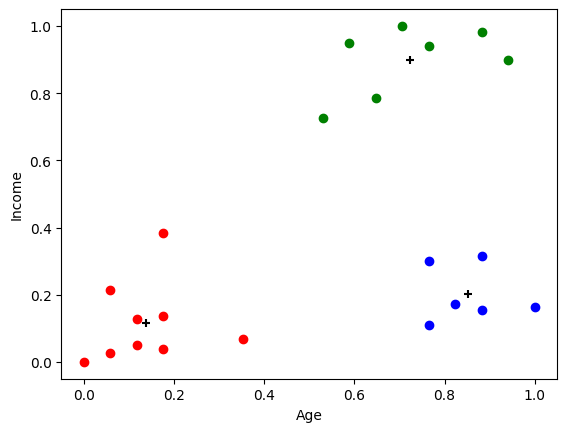

In [81]:
df1=df[df.clusters==0]
df2=df[df.clusters==1]
df3=df[df.clusters==2]
plt.scatter(df1["Age"], df1["Income($)"], color='g')
plt.scatter(df2["Age"], df2["Income($)"], color='r')
plt.scatter(df3["Age"], df3["Income($)"], color='b')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1], color="black",marker="+")
plt.xlabel("Age")
plt.ylabel("Income")

In [84]:
r= range(1,10)
sse=[]
for k in r:
    km=KMeans(n_clusters=k)
    km.fit(df[['Age','Income($)']])
    sse.append(km.inertia_)
sse

c:\Users\KUMAR APPU\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\KUMAR APPU\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\KUMAR APPU\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\KUMAR APPU\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in

[5.434011511988179,
 2.091136388699078,
 0.4750783498553097,
 0.3491047094419566,
 0.2755825568722976,
 0.21055478995472496,
 0.18279994469329935,
 0.13265419827245162,
 0.10188787724979426]

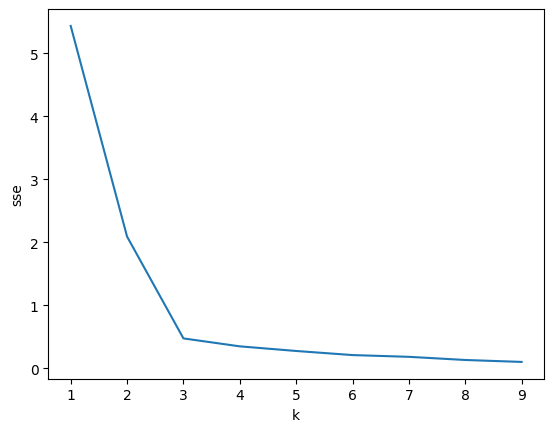

In [85]:
plt.xlabel('k')
plt.ylabel('sse')
plt.plot(r,sse)